In [2]:
import numpy as np
from scipy.signal import iirfilter, filtfilt
import tkinter as tk
from tkinter import ttk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider, Button
import matplotlib.pyplot as plt

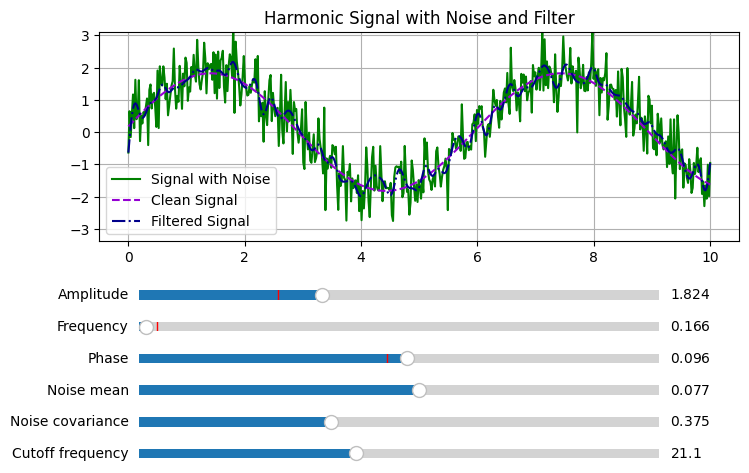

In [3]:
def generate_noise(t, mean, covariance):
    return np.random.normal(mean, np.sqrt(covariance), size=len(t))

def harmonic_with_noise(t, amplitude, frequency, phase, noise):
    y_clean = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    y_noisy = y_clean + noise if noise is not None else y_clean
    return y_noisy, y_clean

def apply_iir_filter(data, cutoff, fs=250, filter_order=4):
    b, a = iirfilter(
        filter_order,
        cutoff / (fs / 2),
        btype='low',
        ftype='butter'
    )
    return filtfilt(b, a, data)

initial_params = {
    "amplitude": 1.404,
    "frequency": 0.266,
    "phase": -0.152,
    "noise_mean": 0.077,
    "noise_covariance": 0.375,
    "show_noise": True,
    "cutoff_frequency": 21.11,
}

t = np.linspace(0, 10, 500)
noise = generate_noise(t, initial_params["noise_mean"], initial_params["noise_covariance"])

y, y_clean = harmonic_with_noise(
    t,
    initial_params["amplitude"],
    initial_params["frequency"],
    initial_params["phase"],
    noise
)
filtered_signal = apply_iir_filter(y, initial_params["cutoff_frequency"])

window = tk.Tk()
window.title("Harmonic Signal Viewer")
window.geometry("800x700")

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.10, bottom=0.55) 
line, = ax.plot(t, y, label="Signal with Noise", color="green")
line_clean, = ax.plot(t, y_clean, linestyle="--", label="Clean Signal", color="darkviolet")
line_filtered, = ax.plot(t, filtered_signal, linestyle="-.", label="Filtered Signal", color="darkblue")
ax.legend()
ax.set_title("Harmonic Signal with Noise and Filter")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True)


canvas = FigureCanvasTkAgg(fig, master=window)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

slider_frame = tk.Frame(window)
slider_frame.pack(side=tk.TOP, fill=tk.X, pady=10)

slider_params = {
    "amplitude": (0.1, 5.0, 0.001),
    "frequency": (0.1, 5.0, 0.001),
    "phase": (-np.pi, np.pi, 0.001),
    "noise_mean": (-1.0, 1.0, 0.001),
    "noise_covariance": (0.01, 1.0, 0.001),
    "cutoff_frequency": (0.5, 50.0, 0.001),
}

sliders = {}
for i, (param, (vmin, vmax, step)) in enumerate(slider_params.items()):
    ax_slider = plt.axes([0.15, 0.45 - i * 0.05, 0.65, 0.03])
    sliders[param] = Slider(
        ax_slider,
        param.capitalize().replace("_", " "),
        vmin,
        vmax,
        valinit=initial_params[param],
        valstep=step,
    )

control_frame = tk.Frame(window)
control_frame.pack(side=tk.BOTTOM, fill=tk.X, padx=10, pady=10)

button_reset = ttk.Button(control_frame, text="Reset", command=lambda: reset(None))
button_reset.pack(side=tk.LEFT, padx=20)

button_show_filtered = ttk.Button(control_frame, text="Show Filtered", command=lambda: toggle_show_filtered(None))
button_show_filtered.pack(side=tk.LEFT, padx=20)

var_noise = tk.BooleanVar(value=initial_params["show_noise"])
switch_noise = ttk.Checkbutton(
    control_frame, text="Show Noise", variable=var_noise, command=lambda: update(None)
)
switch_noise.pack(side=tk.LEFT, padx=20)

show_filtered = True

last_noise_params = {"noise_mean": initial_params["noise_mean"], "noise_covariance": initial_params["noise_covariance"]}

def update(val=None):
    global noise, last_noise_params  

    params = {key: slider.val for key, slider in sliders.items()}
    show_noise = var_noise.get()

    if (
        params["noise_mean"] != last_noise_params["noise_mean"]
        or params["noise_covariance"] != last_noise_params["noise_covariance"]
    ):
        noise = generate_noise(t, params["noise_mean"], params["noise_covariance"])
        last_noise_params["noise_mean"] = params["noise_mean"]
        last_noise_params["noise_covariance"] = params["noise_covariance"]

    y, y_clean = harmonic_with_noise(
        t,
        params["amplitude"],
        params["frequency"],
        params["phase"],
        noise
    )
    filtered = apply_iir_filter(y, params["cutoff_frequency"])

    line.set_ydata(y if show_noise else y_clean)
    line_clean.set_ydata(y_clean)
    line_filtered.set_ydata(filtered if show_filtered else [None] * len(t))

    fig.canvas.draw_idle()

def reset(event):
    for key, slider in sliders.items():
        slider.reset()
    var_noise.set(initial_params["show_noise"])
    update(None)

def toggle_show_filtered(event):
    global show_filtered
    show_filtered = not show_filtered
    line_filtered.set_visible(show_filtered)
    fig.canvas.draw_idle()

for slider in sliders.values():
    slider.on_changed(update)

window.mainloop()


In [4]:
def generate_noise(t, mean, covariance):
    return np.random.normal(mean, np.sqrt(covariance), size=len(t))

def harmonic_with_noise(t, amplitude, frequency, phase, noise):
    y_clean = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    y_noisy = y_clean + noise if noise is not None else y_clean
    return y_noisy, y_clean

def apply_iir_filter(data, cutoff, fs=250, filter_order=4):
    b, a = iirfilter(
        filter_order,
        cutoff / (fs / 2),
        btype='low',
        ftype='butter'
    )
    return filtfilt(b, a, data)

initial_params = {
    "amplitude": 1.404,
    "frequency": 0.266,
    "phase": -0.152,
    "noise_mean": 0.077,
    "noise_covariance": 0.375,
    "show_noise": True,
    "cutoff_frequency": 21.11,
}

t = np.linspace(0, 10, 500)
noise = generate_noise(t, initial_params["noise_mean"], initial_params["noise_covariance"])
y, y_clean = harmonic_with_noise(
    t,
    initial_params["amplitude"],
    initial_params["frequency"],
    initial_params["phase"],
    noise
)
filtered_signal = apply_iir_filter(y, initial_params["cutoff_frequency"])

window = tk.Tk()
window.title("Harmonic Signal Viewer")
window.geometry("900x900")

fig = Figure(figsize=(8, 6))
ax = fig.add_subplot(111)
line, = ax.plot(t, y, label="Signal with Noise", color="orange")
line_clean, = ax.plot(t, y_clean, linestyle="--", label="Clean Signal", color="darkviolet")
line_filtered, = ax.plot(t, filtered_signal, linestyle="-.", label="Filtered Signal", color="darkblue")
ax.legend()
ax.set_title("Harmonic Signal with Noise and Filter")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True)

canvas = FigureCanvasTkAgg(fig, master=window)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack(side=tk.TOP, fill=tk.X, pady=10)

slider_params = {
    "amplitude": (-2.0, 2.0, 0.001),
    "frequency": (-2.0, 2.0, 0.001),
    "phase": (-np.pi, np.pi, 0.001),
    "noise_mean": (-1.0, 1.0, 0.001),
    "noise_covariance": (0.01, 1.0, 0.001),
    "cutoff_frequency": (0.5, 50.0, 0.001),
}

sliders = {}
slider_vars = {}

slider_frame = tk.Frame(window)
slider_frame.pack(side=tk.TOP, fill=tk.X, pady=10)

for i, (param, (vmin, vmax, step)) in enumerate(slider_params.items()):
    slider_label = tk.Label(slider_frame, text=param.capitalize().replace("_", " "), width=20)
    slider_label.grid(row=i, column=0, padx=10, pady=5)

    slider_var = tk.DoubleVar(value=initial_params[param])
    slider_vars[param] = slider_var

    slider = ttk.Scale(
        slider_frame,
        from_=vmin,
        to=vmax,
        variable=slider_var,
        command=lambda val, param=param: update(param, val),
        length=600,
    )
    slider.grid(row=i, column=1, padx=10, pady=5)

    value_label = tk.Label(slider_frame, text=f"{slider_var.get():.3f}", width=10)
    value_label.grid(row=i, column=2, padx=10, pady=5)

    slider_var.trace("w", lambda name, index, mode, var=slider_var, label=value_label: label.config(text=f"{var.get():.3f}"))

frame_controls = tk.Frame(slider_frame)
frame_controls.grid(row=len(slider_params), columnspan=2, pady=10)

button_reset = ttk.Button(frame_controls, text="Reset", command=lambda: reset())
button_reset.pack(side=tk.LEFT, padx=20)

button_show_filtered = ttk.Button(frame_controls, text="Show Filtered", command=lambda: toggle_show_filtered())
button_show_filtered.pack(side=tk.LEFT, padx=20)

var_noise = tk.BooleanVar(value=initial_params["show_noise"])
switch_noise = ttk.Checkbutton(
    frame_controls, text="Show Noise", variable=var_noise, command=lambda: update_noise()
)
switch_noise.pack(side=tk.LEFT, padx=20)

show_filtered = True

def update(param, val):
    global noise, last_noise_params

    params = {key: slider_var.get() for key, slider_var in slider_vars.items()}
    show_noise = var_noise.get()

    if (
        params["noise_mean"] != last_noise_params["noise_mean"]
        or params["noise_covariance"] != last_noise_params["noise_covariance"]
    ):
        noise = generate_noise(t, params["noise_mean"], params["noise_covariance"])
        last_noise_params["noise_mean"] = params["noise_mean"]
        last_noise_params["noise_covariance"] = params["noise_covariance"]

    y, y_clean = harmonic_with_noise(
        t,
        params["amplitude"],
        params["frequency"],
        params["phase"],
        noise
    )
    filtered = apply_iir_filter(y, params["cutoff_frequency"])

    line.set_ydata(y if show_noise else y_clean)
    line_clean.set_ydata(y_clean)
    line_filtered.set_ydata(filtered if show_filtered else [None] * len(t))
    fig.canvas.draw_idle()

def reset():
    for param, slider_var in slider_vars.items():
        slider_var.set(initial_params[param])
    var_noise.set(initial_params["show_noise"])
    update(None, None)

def toggle_show_filtered():
    global show_filtered
    show_filtered = not show_filtered
    line_filtered.set_visible(show_filtered)
    fig.canvas.draw_idle()

def update_noise():
    update(None, None)

window.mainloop()
